Cобираем информацию о фильмах с сайта 'https://www.kinonews.ru/top100/' 
ТОП 500 лучших фильмов по версии пользователей сайта www.kinonews.ru

In [218]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from time import sleep
from fake_useragent import UserAgent
import numpy as np
import pandasql
import matplotlib.pyplot as plt

Для начала попробуем скачать данные с одного фильма.
Получаем нужную нам страницу, проверяем status_code, создаем soup:

In [215]:
url = 'https://www.kinonews.ru/top100/'
p = requests.get(url, headers={'User-Agent': UserAgent().chrome}) 
p.status_code

200

In [216]:
soup = BeautifulSoup(p.content, 'html.parser')
soup

<!DOCTYPE html>

<html dir="ltr" lang="ru" prefix="og: http://ogp.me/ns#" xml:lang="ru" xmlns="http://www.w3.org/1999/xhtml">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# profile: http://ogp.me/ns/profile#">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1, user-scalable=yes" name="viewport"/>
<meta content="max-image-preview:large" name="robots"/>
<title>Топ 100 лучших фильмов</title>
<link href="https://www.kinonews.ru/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="https://www.kinonews.ru/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="Топ 100 лучших фильмов" name="title">
<meta content="Топ 100 лучших фильмов на сайте kinonews.ru" name="keywords"/>
<meta content="Топ 100 лучших фильмов на сайте kinonews.ru" name="description"/>
<meta content="KinoNews.ru" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="Топ 100 лучших фильмов" p

Ищем нужные нам теги с фильмами, берем 1 фильм:

In [10]:
so = soup.find_all('div', {'style': 'overflow:auto;'})[0]
so

<div style="overflow:auto;"><div class="bigtext"><b>1.</b> <a class="titlefilm" href="/movie_796/the-lord-of-the-rings-the-return-of-the-king">Властелин колец 3: Возвращение Короля</a> <span class="bigtext">(The Lord of the Rings: The Return of the King)</span>, 2003</div><div class="relative" style="padding-top:5px;"><div class="rating_leftposter"><a href="/movie_796/the-lord-of-the-rings-the-return-of-the-king" title='Постер к фильму "Властелин колец. Возвращение короля"'><img alt='Постер к фильму "Властелин колец. Возвращение короля"' height="120" src="/insimgs/poster/poster2608_1_prev.jpg" style="margin-right:7px;" width="90"/></a></div><div class="rating_rightdesc"><div class="zhanr_rating">Рейтинг: <span class="rating-big">9.44</span></div>
<div class="textgray"><span class="film-rubrpers">Страна:</span> США, Новая Зеландия</div>
<div class="textgray"><span class="film-rubrpers">Жанр:</span> <a href="/films-action/">боевик</a>, <a href="/films-adventure/">приключения</a>, <a href

Здесь нам нужно получить ссылку, для дальнейшего перехода на страницу с информацией фильма:

In [11]:
url_film = 'https://www.kinonews.ru/'+ so.find_all('a', {'class':'titlefilm'})[0].get('href')
url_film

'https://www.kinonews.ru//movie_796/the-lord-of-the-rings-the-return-of-the-king'

Теперь делаем все тоже самое, только с сылкой с информацией o фильмe:

In [14]:
f = requests.get(url_film, headers={'User-Agent': UserAgent().chrome})
f.status_code


200

In [15]:
soup_f = BeautifulSoup(f.content, 'html.parser')
soup_f

<!DOCTYPE html>

<html dir="ltr" lang="ru" prefix="og: http://ogp.me/ns#" xml:lang="ru" xmlns="http://www.w3.org/1999/xhtml">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# profile: http://ogp.me/ns/profile#">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1, user-scalable=yes" name="viewport"/>
<meta content="max-image-preview:large" name="robots"/>
<title>Фильм Властелин колец 3: Возвращение Короля / The Lord of the Rings: The Return of the King (2003) - вся информация о фильме</title>
<link href="https://www.kinonews.ru/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="https://www.kinonews.ru/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="Фильм Властелин колец 3: Возвращение Короля / The Lord of the Rings: The Return of the King (2003) - вся информация о фильме" name="title">
<meta content="Фильм Властелин колец 3: Возвращение Короля / The Lord of the Rings: The Return

Собираем данные с одного фильма:

In [16]:
# Название фильма
name = soup_f.find_all('h1', {'class': 'film'})[0].text
name

'Властелин колец 3: Возвращение Короля'

In [17]:
# Слоган
sl = soup_f.find_all('div', {'class': 'slogan'})[0].text
slogan = re.findall(r'"(.+)"', sl)[0]
slogan

'В это Рождество великое приключение завершится'

In [18]:
# Год выпуска фильма
year = soup_f.find_all('td', text = re.compile('Год выпуска'))[0].parent
year_film = year.a.text
year_film

'2003'

In [19]:
# Жанры
janre_f = soup_f.find_all('td', text = re.compile('Жанр'))[0].parent
j = janre_f.find_all('span')
janres = []
for i in j:
    janres.append(i.text)
janres  

['боевик', 'приключения', 'фэнтези']

In [21]:
# Режиссер
director = soup_f.find_all('span', {'itemprop':'director'})[0].text
director

'Питер Джексон'

In [24]:
# Страна производства
country = soup_f.find_all('td', text = re.compile('Страна'))[0].parent
country.text
country_film = re.findall(r'Страна:(.+)', country.text )[0]
country_film

'США, Новая Зеландия'

In [25]:
# Премьера в США
premiere_f_usa = soup_f.find_all('td', text = re.compile('Премьера в США'))[0].parent
premiere_film_usa = premiere_f_usa.find_all('td')[1].text
premiere_film_usa

'17.12.2003'

In [27]:
# Премьера в России
premiere_f_russia = soup_f.find_all('td', text = re.compile('Премьера в России'))[0].parent
premiere_f_russia.find_all('td')[1].text
premiere_film_russia = premiere_f_russia.find_all('td')[1].text
premiere_film_russia

'22.01.2004'

In [28]:
# Бюджет фильма
budget_f = soup_f.find_all('td', text = re.compile('Бюджет фильма'))[0].parent
b = budget_f.find_all('td')[1].text

k = re.findall(r'\$([\d\s]+)', b)[0]
budget_film = int(k.replace(' ', ''))
budget_film

94000000

In [30]:
# Кассовые сборы
sbor = soup_f.find_all('td', text = re.compile('Кассовые сборы'))[0].parent
s = sbor.find_all('td')[1].text

c = re.findall(r'\$([\d\s]+)', s)[0]
sbor_film = int(c.replace(' ', ''))
sbor_film

1146030912

In [32]:
# Продолжительность фильма(мин)
time = soup_f.find_all('td', text = re.compile('Продолжительность'))[0].parent
t = time.find_all('td')[1].text
d = re.findall(r'\d+', t)[0]
time_film = int(d)
time_film

201

In [34]:
# Рейтинг по версии сайта www.kinonews.ru
rating = float(soup_f.find_all('span',{'class':'numraitview'})[0].text)
rating

9.44

Теперь делаем для 5 страниц для 500 фильмов:

In [73]:
urls = []

for w in range(1,6):
    url = f'https://www.kinonews.ru/top100_p{w}/'
    urls.append(url)
urls

['https://www.kinonews.ru/top100_p1/',
 'https://www.kinonews.ru/top100_p2/',
 'https://www.kinonews.ru/top100_p3/',
 'https://www.kinonews.ru/top100_p4/',
 'https://www.kinonews.ru/top100_p5/']

In [74]:
film = {}
d = 0
for u in urls:
    page = requests.get(u, headers={'User-Agent': UserAgent().chrome})
    tree = BeautifulSoup(page.content, 'html.parser')
    sleep(1)
    so = tree.find_all('div', {'style': 'overflow:auto;'})
    for i in so:
        url_film = 'https://www.kinonews.ru/'+ i.find_all('a', {'class':'titlefilm'})[0].get('href')
        response = requests.get(url_film, headers={'User-Agent': UserAgent().chrome})
        soup_f = BeautifulSoup(response.content, 'html.parser')
        sleep(3)
        name = soup_f.find_all('h1', {'class': 'film'})[0].text
        print(name)
        year = soup_f.find_all('td', text = re.compile('Год выпуска'))[0].parent
        year_film = year.a.text
    
        janre_f = soup_f.find_all('td', text = re.compile('Жанр'))[0].parent
        j = janre_f.find_all('span')
        janres = []
        for i in j:
            janres.append(i.text)
      
        director = soup_f.find_all('span', {'itemprop':'director'})[0].text
    
        country = soup_f.find_all('td', text = re.compile('Страна'))[0].parent
        country.text
        country_film = re.findall(r'Страна:(.+)', country.text )[0]
    
        try:    
            sl = soup_f.find_all('div', {'class': 'slogan'})[0].text
            slogan = re.findall(r'"(.+)"', sl)[0]
        except:
            slogan = '-'
        try:
            premiere_f_usa = soup_f.find_all('td', text = re.compile('Премьера в США'))[0].parent
            premiere_film_usa = premiere_f_usa.find_all('td')[1].text
        except:    
            premiere_film_usa = '-'
    
    
        try:
            budget_f = soup_f.find_all('td', text = re.compile('Бюджет фильма'))[0].parent
            b = budget_f.find_all('td')[1].text
            k = re.findall(r'\$([\d\s]+)', b)[0]
            budget_film = int(k.replace(' ', ''))
        except:
            budget_film = '-'
        
        try:
            sbor = soup_f.find_all('td', text = re.compile('Кассовые сборы'))[0].parent
            s = sbor.find_all('td')[1].text
            c = re.findall(r'\$([\d\s]+)', s)[0]
            sbor_film = int(c.replace(' ', ''))
        
        except:
            sbor_film = '-'    
        
        try:    
            time = soup_f.find_all('td', text = re.compile('Продолжительность'))[0].parent
            t = time.find_all('td')[1].text
            d = re.findall(r'\d+', t)[0]
            time_film = int(d)    
        except:
            time_film = '-'    
        rating = float(soup_f.find_all('span',{'class':'numraitview'})[0].text)    
    
    
        film[name] = [year_film, janres, director,  country_film, slogan, premiere_film_usa, budget_film, sbor_film, time_film, rating]
        
     

Властелин колец 3: Возвращение Короля
Терминатор 2: Судный день
Побег из Шоушенка
Властелин колец 2: Две крепости
Форрест Гамп
Властелин колец: Братство кольца
Шерлок Холмс и доктор Ватсон: Собака Баскервилей
Шерлок Холмс и доктор Ватсон: Знакомство
Они сражались за Родину
Шерлок Холмс и доктор Ватсон: Кровавая надпись
Список Шиндлера
Шерлок Холмс и доктор Ватсон: Король шантажа
Титаник
Зеленая миля
Шерлок Холмс и доктор Ватсон: Охота на тигра
Матрица
Назад в будущее
Крестный отец
Кавказская пленница, или новые приключения Шурика
12 разгневанных мужчин
Иван Васильевич меняет профессию
Темный рыцарь
Гладиатор
Храброе сердце
Бриллиантовая рука
Пролетая над гнездом кукушки
Молчание ягнят
В бой идут одни "старики"
Джентльмены удачи
Заплати другому
Аватар
Назад в будущее 2
Пираты Карибского моря: Проклятие Черной жемчужины
1+1
Меня зовут Кхан
Тот самый Мюнхгаузен
Десять негритят
Начало
Терминатор
Хороший, плохой, злой
Бен-Гур
День сурка
Собака на сене
Римские каникулы
Ребенок Розмари
Свой с

Матрица 2: Перезагрузка
300 спартанцев
Боец
Особое мнение
Черная дыра
Суини Тодд, демон-парикмахер с Флит-стрит
Страх и ненависть в Лас-Вегасе
Паразиты
Американский психопат
Проклятый путь
Спасатель
Люди Икс: Первый класс


In [76]:
len(film)

498

In [77]:
df = pd.DataFrame(film)
df.T

,0,1,2,3,4,5,6,7,8,9
Властелин колец 3: Возвращение Короля,2003,"[боевик, приключения, фэнтези]",Питер Джексон,"США, Новая Зеландия",В это Рождество великое приключение завершится,17.12.2003,94000000,1146030912,201,9.44
Терминатор 2: Судный день,1991,"[боевик, триллер, фантастика]",Джеймс Кэмерон,США,"Hasta la vista, baby!",03.07.1991,102000000,520881154,137,9.39
Побег из Шоушенка,1994,[драма],Фрэнк Дарабонт,США,Страх - это кандалы. Надежда - это свобода.,23.09.1994,25000000,28341469,142,9.38
Властелин колец 2: Две крепости,2002,"[боевик, приключения, фэнтези]",Питер Джексон,"США, Новая Зеландия",Грядет новый порядок!,05.12.2002,94000000,947495095,179,9.36
Форрест Гамп,1994,"[драма, комедия, мелодрама]",Роберт Земекис,США,-,23.06.1994,55000000,678226133,142,9.36
...,...,...,...,...,...,...,...,...,...,...
Паразиты,2019,"[драма, комедия, триллер]",Пон Джун-хо,Корея Южная,Найди злоумышленника,11.10.2019,11800000,258908069,132,8.24
Американский психопат,2000,"[драма, триллер]",Мэри Хэррон,США,-,14.04.2000,7000000,34266564,101,8.24
Проклятый путь,2002,"[драма, кинокомикс, криминал, приключения]",Сэм Мендес,США,-,12.07.2002,80000000,181001478,117,8.24
Спасатель,2006,"[боевик, драма, приключения]",Эндрю Дэвис,США,"Жертвуй всем, когда нужно спасти людей",29.09.2006,70000000,94973540,139,8.24


In [78]:
# сохранили:
df.to_csv('FF_parsed.csv', index=False)

In [612]:
# прочитали:
data = pd.read_csv('FF_parsed.csv')

In [613]:
data_f = data.transpose()

In [614]:
data_f

,0,1,2,3,4,5,6,7,8,9
Властелин колец 3: Возвращение Короля,2003,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",В это Рождество великое приключение завершится,17.12.2003,94000000,1146030912,201,9.44
Терминатор 2: Судный день,1991,"['боевик', 'триллер', 'фантастика']",Джеймс Кэмерон,США,"Hasta la vista, baby!",03.07.1991,102000000,520881154,137,9.39
Побег из Шоушенка,1994,['драма'],Фрэнк Дарабонт,США,Страх - это кандалы. Надежда - это свобода.,23.09.1994,25000000,28341469,142,9.38
Властелин колец 2: Две крепости,2002,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",Грядет новый порядок!,05.12.2002,94000000,947495095,179,9.36
Форрест Гамп,1994,"['драма', 'комедия', 'мелодрама']",Роберт Земекис,США,-,23.06.1994,55000000,678226133,142,9.36
...,...,...,...,...,...,...,...,...,...,...
Паразиты,2019,"['драма', 'комедия', 'триллер']",Пон Джун-хо,Корея Южная,Найди злоумышленника,11.10.2019,11800000,258908069,132,8.24
Американский психопат,2000,"['драма', 'триллер']",Мэри Хэррон,США,-,14.04.2000,7000000,34266564,101,8.24
Проклятый путь,2002,"['драма', 'кинокомикс', 'криминал', 'приключен...",Сэм Мендес,США,-,12.07.2002,80000000,181001478,117,8.24
Спасатель,2006,"['боевик', 'драма', 'приключения']",Эндрю Дэвис,США,"Жертвуй всем, когда нужно спасти людей",29.09.2006,70000000,94973540,139,8.24


In [615]:
data_films = data_f.reset_index()

In [616]:
data_films.head(2)

,index,0,1,2,3,4,5,6,7,8,9
0,Властелин колец 3: Возвращение Короля,2003,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",В это Рождество великое приключение завершится,17.12.2003,94000000,1146030912,201,9.44
1,Терминатор 2: Судный день,1991,"['боевик', 'триллер', 'фантастика']",Джеймс Кэмерон,США,"Hasta la vista, baby!",03.07.1991,102000000,520881154,137,9.39


In [617]:
data_films.columns = ['название_фильма', 'год_выпуска', 'жанр', 'режиссер', 'страна_производства', 'слоган', 'премьеpа_в_США', 'бюджет_фильма', 'кассовые_сборы', 'продолжительность_(мин)', 'рейтинг']


In [618]:
data_films.head(2)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг
0,Властелин колец 3: Возвращение Короля,2003,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",В это Рождество великое приключение завершится,17.12.2003,94000000,1146030912,201,9.44
1,Терминатор 2: Судный день,1991,"['боевик', 'триллер', 'фантастика']",Джеймс Кэмерон,США,"Hasta la vista, baby!",03.07.1991,102000000,520881154,137,9.39


In [619]:
#сохраняем исправленный датафрейм
data_films.to_csv('FF2_parsed.csv', index=False)

In [620]:
data_films= pd.read_csv('FF2_parsed.csv')

In [621]:
# Смотрим пропуски по столбцам:
for column in data_films[1:-1]:
    print(column, (data_films[column] == '-').sum())   

название_фильма 0
год_выпуска 0
жанр 0
режиссер 0
страна_производства 0
слоган 282
премьеpа_в_США 67
бюджет_фильма 80
кассовые_сборы 88
продолжительность_(мин) 6
рейтинг 0


In [622]:
# Создадим новую колонку 'сколько лет фильму'
data_films['год_выпуска'] = data_films['год_выпуска'].apply(lambda x: int(x))
data_films['сколько лет фильму'] = 2021 - data_films['год_выпуска']
data_films.head(3)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму
0,Властелин колец 3: Возвращение Короля,2003,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",В это Рождество великое приключение завершится,17.12.2003,94000000,1146030912,201,9.44,18
1,Терминатор 2: Судный день,1991,"['боевик', 'триллер', 'фантастика']",Джеймс Кэмерон,США,"Hasta la vista, baby!",03.07.1991,102000000,520881154,137,9.39,30
2,Побег из Шоушенка,1994,['драма'],Фрэнк Дарабонт,США,Страх - это кандалы. Надежда - это свобода.,23.09.1994,25000000,28341469,142,9.38,27


In [623]:
# заменим '-' на 'нет слогана' в колонке слоган:
data_films['слоган'] = [x if x != '-' else 'нет слогана'for x in data_films['слоган']]
data_films.head(5)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму
0,Властелин колец 3: Возвращение Короля,2003,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",В это Рождество великое приключение завершится,17.12.2003,94000000,1146030912,201,9.44,18
1,Терминатор 2: Судный день,1991,"['боевик', 'триллер', 'фантастика']",Джеймс Кэмерон,США,"Hasta la vista, baby!",03.07.1991,102000000,520881154,137,9.39,30
2,Побег из Шоушенка,1994,['драма'],Фрэнк Дарабонт,США,Страх - это кандалы. Надежда - это свобода.,23.09.1994,25000000,28341469,142,9.38,27
3,Властелин колец 2: Две крепости,2002,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",Грядет новый порядок!,05.12.2002,94000000,947495095,179,9.36,19
4,Форрест Гамп,1994,"['драма', 'комедия', 'мелодрама']",Роберт Земекис,США,нет слогана,23.06.1994,55000000,678226133,142,9.36,27


In [624]:
# Датасет включает в себя фильмы следующих годов:
min_y = data_films['год_выпуска'].min()
max_y = data_films['год_выпуска'].max()
print(f'{min_y}-{max_y} г.г.')

1939-2021 г.г.


In [625]:
# Колличество фильмов, входящих в ТОП-500 , производства США, СССР, Россия 
count_USA = data_films[data_films['страна_производства']  == 'США' ]['страна_производства'].count()
count_USSR = data_films[data_films['страна_производства']  == 'СССР' ]['страна_производства'].count()
count_Russia = data_films[data_films['страна_производства']  == 'Россия' ]['страна_производства'].count()
print(f'CША: {count_USA}')
print(f'CCCP: {count_USSR}')
print(f'Poccия: {count_Russia}')

CША: 282
CCCP: 45
Poccия: 7


In [626]:
# 10 самых новых фильмов, входящих в топ-500
query = """
SELECT *
FROM data_films
ORDER BY год_выпуска DESC
"""
tst = pandasql.sqldf(query, locals())
tst.head(10)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму
0,Лига справедливости Зака Снайдера,2021,"['боевик', 'кинокомикс', 'приключения', 'фанта...",Зак Снайдер,США,нет слогана,18.03.2021,70000000,-,242,8.46,0
1,Суд над чикагской семеркой,2020,"['драма', 'триллер']",Аарон Соркин,США,нет слогана,02.10.2020,-,-,-,8.29,1
2,Достать ножи,2019,"['детектив', 'драма', 'комедия', 'криминал', '...",Райан Джонсон,США,нет слогана,27.11.2019,40000000,311653103,131,8.65,2
3,Ford против Ferrari,2019,"['биографический', 'боевик', 'драма', 'спорт']",Джеймс Мэнголд,"США, Франция",нет слогана,15.11.2019,97600000,225508210,152,8.46,2
4,Джокер,2019,"['драма', 'кинокомикс', 'криминал', 'приключен...",Тодд Филлипс,США,нет слогана,03.10.2019,55000000,1074354306,122,8.28,2
5,Паразиты,2019,"['драма', 'комедия', 'триллер']",Пон Джун-хо,Корея Южная,Найди злоумышленника,11.10.2019,11800000,258908069,132,8.24,2
6,Мстители 3: Война бесконечности,2018,"['боевик', 'кинокомикс', 'приключения', 'фанта...",Энтони Руссо,США,нет слогана,27.04.2018,300000000,2048359754,149,8.89,3
7,Миссия невыполнима 6: Последствия,2018,"['боевик', 'приключения', 'триллер']",Кристофер МакКуорри,США,нет слогана,27.07.2018,178000000,791657398,147,8.48,3
8,Зеленая книга,2018,"['биографический', 'драма', 'комедия', 'музыка']",Питер Фаррелли,США,нет слогана,16.11.2018,23000000,321752656,130,8.31,3
9,"Три билборда на границе Эббинга, Миссури",2017,['криминал'],Мартин МакДона,США,нет слогана,10.11.2017,-,160192031,115,8.71,4


In [627]:
# Самые популярные режиссеры
data_films['режиссер'].value_counts().head(10)

Стивен Спилберг    12
Леонид Гайдай       8
Кристофер Нолан     8
Дэвид Финчер        7
Мартин Скорсезе     7
Питер Джексон       7
Роберт Земекис      7
Джеймс Кэмерон      7
Эльдар Рязанов      6
Рон Ховард          6
Name: режиссер, dtype: int64

In [628]:
# Фильмы самого популярного режиссера Cтивена Спилберга:
query = """
SELECT *
FROM data_films
WHERE режиссер = 'Стивен Спилберг'
"""
tst = pandasql.sqldf(query, locals())
tst

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму
0,Список Шиндлера,1993,"['биографический', 'военный', 'драма', 'истори...",Стивен Спилберг,США,Этот список - жизнь,15.12.1993,22000000,322161245,195,9.16,28
1,Парк Юрского периода,1993,"['боевик', 'приключения', 'фантастика']",Стивен Спилберг,США,Самое феноменальное открытие нашего времени......,09.06.1993,63000000,1033928303,127,8.86,28
2,Спасти рядового Райана,1998,"['боевик', 'военный', 'драма']",Стивен Спилберг,США,нет слогана,24.07.1998,70000000,482349603,169,8.83,23
3,Индиана Джонс и последний крестовый поход,1989,"['боевик', 'приключения', 'триллер']",Стивен Спилберг,США,Герой в шляпе вернулся. На этот раз со своим о...,24.05.1989,48000000,474171806,127,8.82,32
4,Индиана Джонс: В поисках утраченного ковчега,1981,"['боевик', 'приключения', 'триллер']",Стивен Спилберг,США,нет слогана,12.06.1981,18000000,389925971,115,8.78,40
5,"Поймай меня, если сможешь",2002,"['биографический', 'драма', 'криминал']",Стивен Спилберг,США,Правдивая история о реальном преступнике,25.12.2002,52000000,352114312,141,8.73,19
6,Индиана Джонс и Храм Судьбы,1984,"['боевик', 'приключения']",Стивен Спилберг,США,нет слогана,23.05.1984,28000000,333107271,118,8.54,37
7,Искусственный разум,2001,"['драма', 'приключения', 'фантастика']",Стивен Спилберг,США,нет слогана,29.06.2001,100000000,235926552,146,8.53,20
8,Мюнхен,2005,"['биографический', 'драма', 'исторический', 'к...",Стивен Спилберг,США,нет слогана,23.12.2005,70000000,130358645,164,8.50,16
9,Терминал,2004,"['драма', 'комедия', 'мелодрама']",Стивен Спилберг,США,нет слогана,18.06.2004,60000000,219100084,128,8.43,17


In [439]:
# Создаем новый датафрейм, где есть только фильмы, у которых указан бюджет и кассовые сборы, и продолжительность фильма
# в нем  созаем новую колонку 'прибыль'
 

In [629]:
new_data_films = data_films[(data_films['бюджет_фильма'] != '-')
                         & (data_films['кассовые_сборы'] != '-')
                         &(data_films['продолжительность_(мин)'] != '-')]

In [630]:
new_data_films.head(3)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму
0,Властелин колец 3: Возвращение Короля,2003,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",В это Рождество великое приключение завершится,17.12.2003,94000000,1146030912,201,9.44,18
1,Терминатор 2: Судный день,1991,"['боевик', 'триллер', 'фантастика']",Джеймс Кэмерон,США,"Hasta la vista, baby!",03.07.1991,102000000,520881154,137,9.39,30
2,Побег из Шоушенка,1994,['драма'],Фрэнк Дарабонт,США,Страх - это кандалы. Надежда - это свобода.,23.09.1994,25000000,28341469,142,9.38,27


In [631]:
# сохраняем:
new_data_films.to_csv('new_data_films.csv', index = False)

In [632]:
# читаем:
new_data_films = pd.read_csv('new_data_films.csv')

In [633]:
# создаем новую колонку:
new_data_films['прибыль'] = new_data_films['кассовые_сборы'] -  new_data_films['бюджет_фильма']
new_data_films.head(3)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму,прибыль
0,Властелин колец 3: Возвращение Короля,2003,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",В это Рождество великое приключение завершится,17.12.2003,94000000,1146030912,201,9.44,18,1052030912
1,Терминатор 2: Судный день,1991,"['боевик', 'триллер', 'фантастика']",Джеймс Кэмерон,США,"Hasta la vista, baby!",03.07.1991,102000000,520881154,137,9.39,30,418881154
2,Побег из Шоушенка,1994,['драма'],Фрэнк Дарабонт,США,Страх - это кандалы. Надежда - это свобода.,23.09.1994,25000000,28341469,142,9.38,27,3341469


In [634]:
# 10 Фильмов с максимальной прибылью
query = """
SELECT *
FROM new_data_films
ORDER BY прибыль DESC
"""
tst = pandasql.sqldf(query, locals())
tst.head(10)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму,прибыль
0,Аватар,2009,"['боевик', 'драма', 'приключения', 'фантастика']",Джеймс Кэмерон,США,нет слогана,18.12.2009,237000000,2847246203,162,9.01,12,2610246203
1,Титаник,1997,"['драма', 'исторический', 'мелодрама']",Джеймс Кэмерон,США,Сердце женщины хранит океан секретов,19.12.1997,200000000,2201647264,194,9.13,24,2001647264
2,Мстители 3: Война бесконечности,2018,"['боевик', 'кинокомикс', 'приключения', 'фанта...",Энтони Руссо,США,нет слогана,27.04.2018,300000000,2048359754,149,8.89,3,1748359754
3,Мстители,2012,"['боевик', 'кинокомикс', 'приключения', 'фанта...",Джосс Уидон,США,нет слогана,04.05.2012,220000000,1518815515,143,8.67,9,1298815515
4,Гарри Поттер и Дары смерти: Часть 2,2011,"['детектив', 'драма', 'приключения', 'фэнтези']",Дэвид Йэтс,"США, Великобритания",Все закончится,12.07.2011,125000000,1342321665,130,8.40,10,1217321665
5,Властелин колец 3: Возвращение Короля,2003,"['боевик', 'приключения', 'фэнтези']",Питер Джексон,"США, Новая Зеландия",В это Рождество великое приключение завершится,17.12.2003,94000000,1146030912,201,9.44,18,1052030912
6,Джокер,2019,"['драма', 'кинокомикс', 'криминал', 'приключен...",Тодд Филлипс,США,нет слогана,03.10.2019,55000000,1074354306,122,8.28,2,1019354306
7,Парк Юрского периода,1993,"['боевик', 'приключения', 'фантастика']",Стивен Спилберг,США,Самое феноменальное открытие нашего времени......,09.06.1993,63000000,1033928303,127,8.86,28,970928303
8,"007: Координаты ""Скайфолл""",2012,"['боевик', 'приключения', 'триллер']",Сэм Мендес,"США, Великобритания",нет слогана,09.11.2012,200000000,1108569499,143,8.24,9,908569499
9,Первый мститель 3: Противостояние,2016,"['боевик', 'кинокомикс', 'триллер', 'фантастика']",Энтони Руссо,США,нет слогана,06.05.2016,250000000,1153337496,146,8.39,5,903337496


In [635]:
# 10 Фильмов с максимальым бюджетом
query = """
SELECT *
FROM new_data_films
ORDER BY "бюджет_фильма" DESC
"""
tst = pandasql.sqldf(query, locals())
tst.head(10)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму,прибыль
0,Мстители 3: Война бесконечности,2018,"['боевик', 'кинокомикс', 'приключения', 'фанта...",Энтони Руссо,США,нет слогана,27.04.2018,300000000,2048359754,149,8.89,3,1748359754
1,Пираты Карибского моря 3: На краю Света,2007,"['боевик', 'драма', 'комедия', 'приключения', ...",Гор Вербински,США,нет слогана,25.05.2007,300000000,960996492,169,8.65,14,660996492
2,Первый мститель 3: Противостояние,2016,"['боевик', 'кинокомикс', 'триллер', 'фантастика']",Энтони Руссо,США,нет слогана,06.05.2016,250000000,1153337496,146,8.39,5,903337496
3,Темный рыцарь 2: Возрождение легенды,2012,"['боевик', 'драма', 'кинокомикс', 'криминал', ...",Кристофер Нолан,"США, Великобритания",И разгорится пламя,20.07.2012,250000000,1081142612,164,8.28,9,831142612
4,Аватар,2009,"['боевик', 'драма', 'приключения', 'фантастика']",Джеймс Кэмерон,США,нет слогана,18.12.2009,237000000,2847246203,162,9.01,12,2610246203
5,Пираты Карибского моря 2: Сундук мертвеца,2006,"['боевик', 'драма', 'комедия', 'мелодрама', 'п...",Гор Вербински,США,нет слогана,07.07.2006,225000000,1066179747,151,8.82,15,841179747
6,Хоббит 2: Пустошь Смауга,2013,"['приключения', 'семейный', 'фэнтези']",Питер Джексон,США,нет слогана,13.12.2013,225000000,958366855,161,8.36,8,733366855
7,Мстители,2012,"['боевик', 'кинокомикс', 'приключения', 'фанта...",Джосс Уидон,США,нет слогана,04.05.2012,220000000,1518815515,143,8.67,9,1298815515
8,Кинг Конг,2005,"['драма', 'мелодрама', 'приключения']",Питер Джексон,"Германия, США, Новая Зеландия",Дамы и господа! Восьмое чудо света!,14.12.2005,207000000,562363449,187,8.61,16,355363449
9,Титаник,1997,"['драма', 'исторический', 'мелодрама']",Джеймс Кэмерон,США,Сердце женщины хранит океан секретов,19.12.1997,200000000,2201647264,194,9.13,24,2001647264


In [644]:
# 10 Фильмов с минимальным бюджетом
query = """
SELECT *
FROM new_data_films
ORDER BY "бюджет_фильма" 
"""
tst = pandasql.sqldf(query, locals())
tst.head(10)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму,прибыль
0,За пригоршню долларов,1964,"['боевик', 'вестерн']",Серджио Леоне,"Италия, Испания, Германия (ФРГ)",нет слогана,18.01.1967,200000,14516248,99,8.65,57,14316248
1,Психо,1960,"['детектив', 'триллер', 'ужасы']",Альфред Хичкок,США,нет слогана,08.09.1960,806947,32000000,109,8.54,61,31193053
2,Окно во двор,1954,"['детектив', 'криминал', 'триллер']",Альфред Хичкок,США,нет слогана,03.09.1954,1000000,37032034,112,8.75,67,36032034
3,Изгоняющий дьявола,1973,"['драма', 'триллер', 'ужасы']",Уильям Фридкин,США,Между наукой и суевериями есть иной мир. Мир т...,26.12.1973,1000000,441306145,122,8.38,48,440306145
4,Рокки,1976,"['боевик', 'спорт']",Джон Г. Эвилдсен,США,Вся его жизнь - это миллион и один выстрел,03.12.1976,1100000,225000000,120,8.75,45,223900000
5,Пила: Игра на выживание,2004,"['детектив', 'триллер', 'ужасы']",Джеймс Ван,"США, Австралия",Сколько крови ты прольешь для нее?,29.10.2004,1200000,103096345,103,8.61,17,101896345
6,Бешеные псы,1992,"['драма', 'криминал', 'триллер']",Квентин Тарантино,США,Давайте закончим работу,23.10.1992,1200000,2832029,99,8.55,29,1632029
7,Таксист,1976,"['драма', 'криминал', 'триллер']",Мартин Скорсезе,США,нет слогана,08.02.1976,1300000,28262574,114,8.28,45,26962574
8,Римские каникулы,1953,"['драма', 'комедия', 'мелодрама']",Уильям Уайлер,США,нет слогана,02.09.1953,1500000,12000000,132,8.94,68,10500000
9,"Карты, деньги и два ствола",1998,"['криминал', 'триллер']",Гай Ричи,Великобритания,нет слогана,05.03.1999,1500000,3753929,107,8.64,23,2253929


In [684]:
# 3 Фильма с максимальными кассовыми сборами
query = """
SELECT *
FROM new_data_films
ORDER BY кассовые_сборы DESC
"""
tst = pandasql.sqldf(query, locals())
tst.head(3)

,название_фильма,год_выпуска,жанр,режиссер,страна_производства,слоган,премьеpа_в_США,бюджет_фильма,кассовые_сборы,продолжительность_(мин),рейтинг,сколько лет фильму,прибыль
0,Аватар,2009,"['боевик', 'драма', 'приключения', 'фантастика']",Джеймс Кэмерон,США,нет слогана,18.12.2009,237000000,2847246203,162,9.01,12,2610246203
1,Титаник,1997,"['драма', 'исторический', 'мелодрама']",Джеймс Кэмерон,США,Сердце женщины хранит океан секретов,19.12.1997,200000000,2201647264,194,9.13,24,2001647264
2,Мстители 3: Война бесконечности,2018,"['боевик', 'кинокомикс', 'приключения', 'фанта...",Энтони Руссо,США,нет слогана,27.04.2018,300000000,2048359754,149,8.89,3,1748359754


In [636]:
min_f = new_data_films['продолжительность_(мин)'].min()
max_f = new_data_films['продолжительность_(мин)'].max()
print(f'Самый короткий фильм  длится {min_f}, а самый длинный {max_f}')

Самый короткий фильм  длится 81, а самый длинный 238


In [637]:
# самые короткие фильмы в датафрейме new_data_films:
query = """
SELECT название_фильма, "продолжительность_(мин)"
FROM new_data_films
WHERE "продолжительность_(мин)" = 81
"""
tst = pandasql.sqldf(query, locals())
tst 

,название_фильма,продолжительность_(мин)
0,Телефонная будка,81
1,Зловещие мертвецы 3: Армия тьмы,81


In [638]:
# самый длинный фильм в датафрейме new_data_films:
query = """
SELECT название_фильма, "продолжительность_(мин)"
FROM new_data_films
WHERE "продолжительность_(мин)" = 238
"""
tst = pandasql.sqldf(query, locals())
tst

,название_фильма,продолжительность_(мин)
0,Унесенные ветром,238


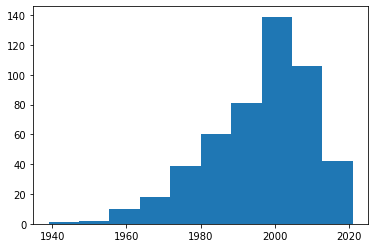

In [681]:
plt.hist(data_films.год_выпуска);

Как видно по графику, начиная с 1960 г начали больше снимать фильмов. Больше всего фильмов 
с высоким рейтингом по мнению пользователей сайта www.kinonews.ru снимали с 1999 по 2005

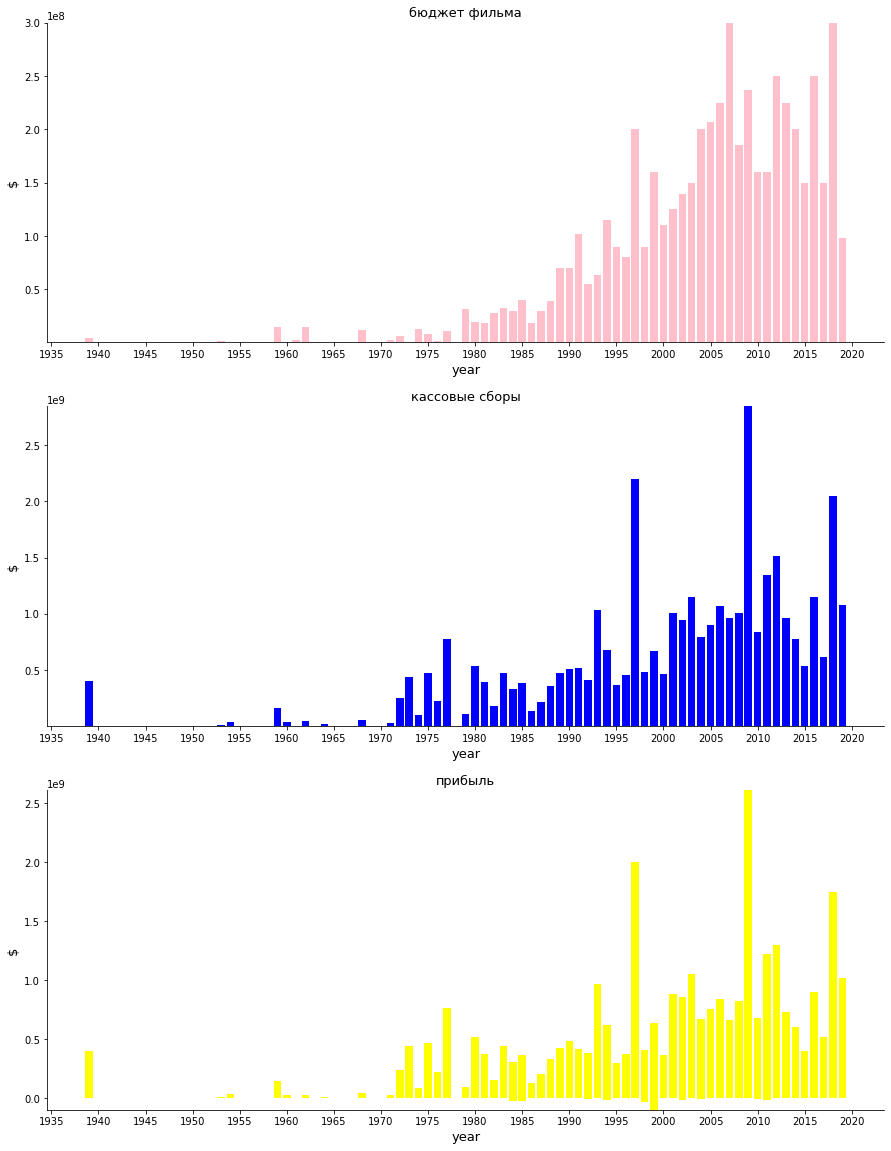

In [682]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(3, figsize = (15,20))
for x in range(3):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].set_xlabel('year', fontsize = 13)
    ax[x].set_ylabel('$', fontsize = 13)
    ax[x].xaxis.set_major_locator(ticker.MultipleLocator(5))
    
ax[0].set_title('бюджет фильма', fontsize = 13)
ax[0].set_ylim(200000,300000000)
ax[0].bar(new_data_films.год_выпуска, new_data_films.бюджет_фильма, color = 'pink' )
ax[1].set_title('кассовые сборы', fontsize = 13)
ax[1].bar(new_data_films.год_выпуска, new_data_films.кассовые_сборы, color = 'blue' )
ax[1].set_ylim(8449,2847246203)
ax[2].set_title('прибыль', fontsize = 13)
ax[2].bar(new_data_films.год_выпуска, new_data_films.прибыль, color = 'yellow')
ax[2].set_ylim(-98301101,2610246203);

Как видно из первого графика, с 1985 г. по  2007 г  затраты на создание фильмов стали стремительно расти,
затем стабилизировались.
По второму графику можно увидеть небольшой рост кассовых сборов, но в целом сильных всплесков по годам нет.
Хорошо видно, что 3  фильма выделяются на общем фоне, они  заработали больше всех. Это Титаник(1997), Аватар(2009), 
Мстители 3: Война бесконечности(2018)